In [17]:
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [18]:
IMAGE_SIZE = [224, 224]
res = tensorflow.keras.applications.ResNet152V2(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [19]:
x = res.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(46, activation='softmax')(x)
model = Model(inputs=res.input, outputs=predictions)

In [20]:
for layer in res.layers:
    layer.trainable = False

In [21]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
training_set = train_datagen.flow_from_directory('Datasets/augmented_dataset_80_10_10/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')
validation = test_datagen.flow_from_directory('Datasets/augmented_dataset_80_10_10/validation', 
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 14894 images belonging to 46 classes.
Found 266 images belonging to 46 classes.


In [24]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Epoch 1/25
466/466 [==============================] - 102s 218ms/step - loss: 1.1710 - accuracy: 0.6673 - val_loss: 0.6109 - val_accuracy: 0.8233
Epoch 2/25
466/466 [==============================] - 100s 216ms/step - loss: 0.2950 - accuracy: 0.9082 - val_loss: 0.4668 - val_accuracy: 0.8496
Epoch 3/25
466/466 [==============================] - 101s 216ms/step - loss: 0.1498 - accuracy: 0.9542 - val_loss: 0.5069 - val_accuracy: 0.8534
Epoch 4/25
466/466 [==============================] - 102s 219ms/step - loss: 0.0983 - accuracy: 0.9711 - val_loss: 0.6216 - val_accuracy: 0.8008
Epoch 5/25
466/466 [==============================] - 100s 214ms/step - loss: 0.0810 - accuracy: 0.9753 - val_loss: 0.5035 - val_accuracy: 0.8383
Epoch 6/25
466/466 [==============================] - 101s 216ms/step - loss: 0.0828 - accuracy: 0.9752 - val_loss: 0.6897 - val_accuracy: 0.8158
Epoch 7/25
466/466 [==============================] - 102s 220ms/step - loss: 0.1172 - accuracy: 0.9614 - val_loss: 0.8235 -

In [ ]:
for i, layer in enumerate(res .layers):
   print(i, layer.name)

In [29]:
for layer in model.layers[:130]:
   layer.trainable = False
for layer in model.layers[130:]:
   layer.trainable = True

In [30]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
r = model.fit_generator(
  training_set,
  validation_data=validation,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation)
)

Epoch 1/25
466/466 [==============================] - 559s 1s/step - loss: 0.3425 - accuracy: 0.8999 - val_loss: 0.2529 - val_accuracy: 0.9323
Epoch 2/25
466/466 [==============================] - 553s 1s/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.2650 - val_accuracy: 0.9323
Epoch 3/25
466/466 [==============================] - 554s 1s/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.2439 - val_accuracy: 0.9286
Epoch 4/25
466/466 [==============================] - 553s 1s/step - loss: 0.0506 - accuracy: 0.9841 - val_loss: 0.1723 - val_accuracy: 0.9511
Epoch 5/25
466/466 [==============================] - 554s 1s/step - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.1449 - val_accuracy: 0.9436
Epoch 6/25
466/466 [==============================] - 554s 1s/step - loss: 0.0475 - accuracy: 0.9882 - val_loss: 0.1571 - val_accuracy: 0.9511
Epoch 7/25
466/466 [==============================] - 554s 1s/step - loss: 0.0234 - accuracy: 0.9936 - val_loss: 0.2304 - val_accuracy: 0.9398

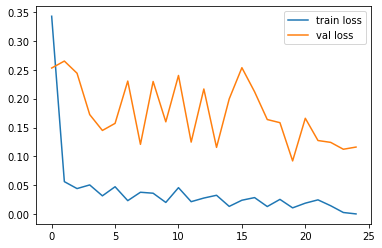

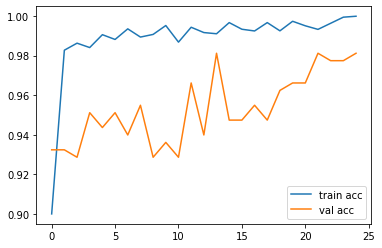

<Figure size 432x288 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [7]:
test = test_datagen.flow_from_directory('Datasets/augmented_dataset_80_10_10/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

NameError: name 'test_datagen' is not defined

In [6]:
X_test,y_test=test.next()
test_loss, test_acc = model.evaluate(X_test, y_test)

NameError: name 'test' is not defined

In [5]:
Y_pred = model.predict(X_test)

NameError: name 'model' is not defined